In [1]:
# Import dependencies
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [55]:
# Read in encoded data
# buys = pd.read_csv('../preProcessing/buys_encoded.csv', index_col=0)
buys = pd.read_csv('../preProcessing/rents_encoded.csv', index_col=0)

In [56]:
buys.head()

,city_Antelope,city_Carmichael,city_Citrus Heights,city_Elk Grove,city_Fair Oaks,city_Folsom,city_Gold River,city_North Highlands,city_Orangevale,city_Rancho Cordova,...,zipcode_95841,zipcode_95842,zipcode_95843,zipcode_95864,beds,baths,square_footage,year_built,deposit,price
2318,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,3.0,2.0,1043.0,1958.0,1850.0,1650
2320,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2.0,2.0,1000.0,1950.0,1000.0,1400
2321,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2.0,1.5,750.0,1972.0,1695.0,1695
2322,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2.0,2.0,850.0,1972.0,1625.0,1625
2323,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2.0,2.0,1200.0,1972.0,1625.0,1625


In [57]:
print(len(buys))
buys = buys.drop_duplicates()
print(len(buys))

2095
985


In [58]:
price_mean = buys['price'].mean()
price_std = buys['price'].std()
buys.loc[buys['price']>=(price_mean+2*price_std),:]

,city_Antelope,city_Carmichael,city_Citrus Heights,city_Elk Grove,city_Fair Oaks,city_Folsom,city_Gold River,city_North Highlands,city_Orangevale,city_Rancho Cordova,...,zipcode_95841,zipcode_95842,zipcode_95843,zipcode_95864,beds,baths,square_footage,year_built,deposit,price
2420,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3.0,3.0,1707.0,2008.0,3500.0,3500
2618,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3.0,2.5,1449.0,1998.0,3500.0,3200
2834,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,4.0,3.5,3151.0,1994.0,4000.0,3850
2835,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,4.0,2.5,2869.0,1965.0,3450.0,3400
2845,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,5.0,3.5,2339.0,1950.0,3350.0,3350
2864,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,3.0,3.0,3229.0,1961.0,4000.0,4000
3104,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3.0,2.0,1199.0,1937.0,4000.0,3400
3222,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3.0,3.0,2500.0,1902.0,6000.0,3730
3260,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,6.0,5.0,6257.0,2007.0,2000000.0,9595
3264,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,4.0,3.0,2990.0,1968.0,3950.0,3950


In [59]:
37/len(buys)*100

3.7563451776649748

## Buys Modeling

In [60]:
# Separate input/output data ('price' is our output)
X_buys = buys.iloc[:,0:-1]
y_buys = buys['price'].values.reshape(-1,1)

In [61]:
# Train_test_split
X_buys_train, X_buys_test, y_buys_train, y_buys_test = train_test_split(X_buys, y_buys, random_state=42)
X_buys_train.head()

,city_Antelope,city_Carmichael,city_Citrus Heights,city_Elk Grove,city_Fair Oaks,city_Folsom,city_Gold River,city_North Highlands,city_Orangevale,city_Rancho Cordova,...,zipcode_95838,zipcode_95841,zipcode_95842,zipcode_95843,zipcode_95864,beds,baths,square_footage,year_built,deposit
3049,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2.0,1.5,1200.0,1970.0,1200.0
2844,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3.0,2.0,937.0,1972.0,950.0
3411,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,4.0,2.0,1670.0,1967.0,3000.0
2378,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2.0,2.0,600.0,1972.0,1495.0
2548,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2.0,2.0,5020.0,1963.0,1000.0


In [62]:
# Scale/normalize data
from sklearn.preprocessing import StandardScaler
X_buys_scaler = StandardScaler().fit(X_buys_train)
y_buys_scaler = StandardScaler().fit(y_buys_train)

X_buys_train_scaled = X_buys_scaler.transform(X_buys_train)
X_buys_test_scaled = X_buys_scaler.transform(X_buys_test)
y_buys_train_scaled = y_buys_scaler.transform(y_buys_train)
y_buys_test_scaled = y_buys_scaler.transform(y_buys_test)

In [63]:
model = LinearRegression()
model.fit(X_buys_train_scaled, y_buys_train)
model.score(X_buys_train_scaled, y_buys_train)

0.7464426017681962

In [64]:
unscaled_model = LinearRegression()
unscaled_model.fit(X_buys_train, y_buys_train)
unscaled_model.score(X_buys_train, y_buys_train)

0.7705387189366428

In [65]:
from sklearn.metrics import mean_absolute_error
predictions = model.predict(X_buys_test_scaled)
# print(y_buys_test)
mean_absolute_error(y_buys_test, predictions)

1855791206338597.2

In [66]:
unscaled_predictions = unscaled_model.predict(X_buys_test)
mean_absolute_error(y_buys_test, unscaled_predictions)


1204359759.5905633

In [67]:
error_list = []
for i in range(len(y_buys_test)):
    error_list.append(abs(predictions[i] - y_buys_test[i]))
    if abs(predictions[i]) > 9000:
        print(i, predictions[i], y_buys_test[i])
    
mae = sum(error_list)/len(error_list)
print(mae)

8 [-1.71821785e+16] [9595]
54 [1.62358483e+16] [2800]
114 [-3.40568965e+15] [700]
115 [8.94107371e+16] [1800]
132 [1.62358483e+16] [1700]
133 [8.94107371e+16] [1846]
151 [-1.0351425e+17] [1795]
152 [-4.75686241e+15] [1100]
212 [3.8711196e+16] [2295]
233 [-7.95170801e+16] [2500]
[1.85579121e+15]


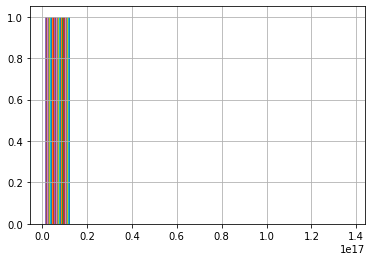

In [35]:
pd.Series(error_list).hist()